In [3]:
import subprocess
import os
import sys

import matplotlib.backends.backend_pdf
import scanpy as sc
import matplotlib.pyplot as pl
import anndata as ad
import pandas as pd
import numpy as np
import seaborn as sns
import scvelo as scv
scv.settings.verbosity=1

# Jupyter stuff
from tqdm.notebook import tqdm
from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline

# Custom functions
sys.path.insert(1, '../..')
from utils import *

# paths
at_home = False if '/fast/work/users/' in os.getcwd() else True
data_path = '/extra/stefan/data/perturbation_resource_paper/' if at_home else '/fast/work/users/peidlis_c/data/perturbation_resource_paper/'
signatures_path = '/home/peidli/utils/scrnaseq_signature_collection/' if at_home else '/fast/work/users/peidlis_c/utils/scrnaseq_signature_collection/'
utils_path = '/extra/stefan/utils/scrnaseq_utils/' if at_home else '/fast/work/users/peidlis_c/utils/single_cell_rna_seq/scrnaseq_utils/'

# Stefan's utils
sys.path.insert(1, utils_path)
from scrnaseq_util_functions import *

colors_perturbation_types = {
    'CRISPRi': 'tab:blue', 
    'CRISPRa': 'tab:red', 
    'CRISPR': 'tab:orange', 
    'drug': 'tab:green',
    'cytokine': 'tab:olive'
}
SDIR = '/fast/scratch/users/peidlis_c/perturbation_resource_paper/'
table_path = '/fast/work/users/peidlis_c/projects/perturbation_resource_paper/single_cell_perturbation_data/code/notebooks/data_analysis/analysis_screens/tables/'

In [26]:
# get distances
key = 'ZhaoSims2021'
SDIR = '/fast/scratch/users/peidlis_c/perturbation_resource_paper/'
adata = sc.read(SDIR+'tmp_data_' + key + '.h5')  

# MMD testing

In [7]:
# !pip install git+https://github.com/calico/scmmd
# !pip install git+https://github.com/josipd/torch-two-sample

https://github.com/calico/scmmd

In [8]:
import scmmd

# distances, p_values = scmmd.compute_mmd_contrast(
#     adata=adata, # [Cells, Genes] object
#     representation='X_pca', # representation to use, "X" or key in `adata.obsm`.
#     groupby='cell_type', # a categorical grouping variable in `adata.obs`
#     contrast='age', # a binary contrast in `adata.obs`
#     n_iters=100, # number of random sampling iterations
#     sample_size=500, # sample size for random samples
#     n_permutations=1000, # permutations for p-val calculations
# )

In [27]:
score_cell_cycle(adata)

In [28]:
adata.obs['cycling'] = ['non-cycling' if c=='G1' else 'cycling' for c in adata.obs.phase]

In [29]:
adata

AnnData object with n_obs × n_vars = 13545 × 26154
    obs: 'sample', 'GEO', 'Sample', 'tissue', 'age', 'sex', 'location', 'diagnosis', 'library', 'dose_value', 'dose_unit', 'perturbation', 'tissue_type', 'cancer', 'disease', 'celltype', 'organism', 'perturbation_type', 'ncounts', 'ngenes', 'percent_mito', 'percent_ribo', 'nperts', 'n_counts', 'S_score', 'G2M_score', 'phase', 'cycling'
    var: 'ncounts', 'ncells', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'neighbors', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [30]:
subdata = sc.pp.subsample(adata, n_obs=2000, copy=True)
subdata

AnnData object with n_obs × n_vars = 2000 × 26154
    obs: 'sample', 'GEO', 'Sample', 'tissue', 'age', 'sex', 'location', 'diagnosis', 'library', 'dose_value', 'dose_unit', 'perturbation', 'tissue_type', 'cancer', 'disease', 'celltype', 'organism', 'perturbation_type', 'ncounts', 'ngenes', 'percent_mito', 'percent_ribo', 'nperts', 'n_counts', 'S_score', 'G2M_score', 'phase', 'cycling'
    var: 'ncounts', 'ncells', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'neighbors', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [31]:
distances, p_values = scmmd.compute_mmd_contrast(
    adata=subdata, # [Cells, Genes] object
    representation='X_pca', # representation to use, "X" or key in `adata.obsm`.
    groupby='perturbation', # a categorical grouping variable in `adata.obs`
    contrast='cycling', # a binary contrast in `adata.obs`
    n_iters=100, # number of random sampling iterations
    sample_size=500, # sample size for random samples
    n_permutations=1000, # permutations for p-val calculations
)

Computing distances for Ana-12
57 samples in Ana-12 cycling,is smaller than 500
237 samples in Ana-12 non-cycling,is smaller than 500


Computing distances: 100%|██████████| 100/100 [07:38<00:00,  4.59s/it]


Computing distances for Ispenisib
58 samples in Ispenisib cycling,is smaller than 500
240 samples in Ispenisib non-cycling,is smaller than 500


Computing distances: 100%|██████████| 100/100 [07:38<00:00,  4.58s/it]


Computing distances for RO4929097
56 samples in RO4929097 cycling,is smaller than 500
238 samples in RO4929097 non-cycling,is smaller than 500


Computing distances: 100%|██████████| 100/100 [07:36<00:00,  4.57s/it]


Computing distances for Tazemetostat
62 samples in Tazemetostat cycling,is smaller than 500
235 samples in Tazemetostat non-cycling,is smaller than 500


Computing distances: 100%|██████████| 100/100 [07:34<00:00,  4.55s/it]


Computing distances for control
71 samples in control cycling,is smaller than 500
199 samples in control non-cycling,is smaller than 500


Computing distances: 100%|██████████| 100/100 [07:34<00:00,  4.54s/it]


Computing distances for etoposide
95 samples in etoposide cycling,is smaller than 500
171 samples in etoposide non-cycling,is smaller than 500


Computing distances: 100%|██████████| 100/100 [07:25<00:00,  4.45s/it]


Computing distances for panobinostat
70 samples in panobinostat cycling,is smaller than 500
211 samples in panobinostat non-cycling,is smaller than 500


Computing distances: 100%|██████████| 100/100 [07:10<00:00,  4.31s/it]


In [33]:
distances.shape  # [perturbations, Iterations, (Contrast, A-A, B-B)]

(7, 100, 3)

In [52]:
md = np.mean(distances, axis=1)[:,0]
pv = np.mean(p_values, axis=1)

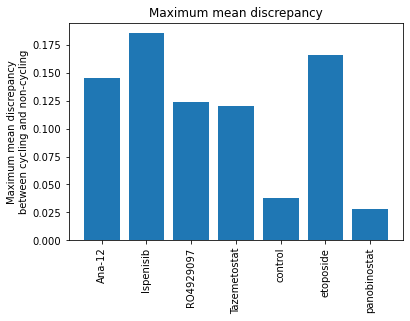

In [62]:
pl.bar(np.arange(len(md)), md)
pl.xticks(np.arange(len(md)), np.unique(subdata.obs.perturbation), rotation=90)
pl.ylabel('Maximum mean discrepancy\nbetween cycling and non-cycling')
pl.title('Maximum mean discrepancy')
pl.show()